In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read Datasets

In [58]:
movie_data= pd.read_csv('/Users/ziranmin/Desktop/ml-latest-small/movies.csv')
movie_data.shape

(9742, 3)

In [59]:
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
movie_data = data['movieId'].unique().tolist()
len(movies)

9742

In [230]:
rating_data=pd.read_csv('/Users/ziranmin/Desktop/ml-latest-small/ratings.csv')
rating_data.shape

(100836, 4)

In [37]:
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [41]:
tags_data=pd.read_csv('/Users/ziranmin/Desktop/ml-latest-small/tags.csv')
tags_data.shape

(3683, 4)

In [43]:
tags_data.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


# 2. Check Missing Value

In [45]:
movie_data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [46]:
rating_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [47]:
tags_data.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

# 3. Pre-processing Data & Visualization

## Change timestamp format 

In [246]:
import time
rating_data['timestamp'] = rating_data['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000
1,1,3,4.0,2000
2,1,6,4.0,2000
3,1,47,5.0,2000
4,1,50,5.0,2000


In [56]:
pd.unique(rating_data['timestamp'])

array(['2000', '2015', '2011', '2001', '1999', '1996', '2005', '2006',
       '2007', '2003', '2016', '1998', '2009', '2017', '2013', '2012',
       '2018', '2014', '2010', '1997', '2004', '2002', '2008'],
      dtype=object)

## Add Movie Year 

In [64]:
movie_data['year'] =movie_data['title'].str.extract('.*\((.*)\).*',expand = False)
movie_data.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


## Merge Two Tables 

In [79]:
movie_ratings = pd.merge(movie_data, rating_data)

## Top 10 Most Rated Movies 

In [138]:
a = movie_ratings.groupby(['title'], as_index=False)['userId'].agg(['count'])
a.sort_values(by=['count'],ascending=False)[:10]

,count
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
Star Wars: Episode IV - A New Hope (1977),251
Jurassic Park (1993),238
Braveheart (1995),237
Terminator 2: Judgment Day (1991),224


### A movie is rated by 10 users on average 

In [149]:
sum(a['count'])/len(a)

10.375141475460438

## Top 10 Users who rated most movies  

In [139]:
b = rating_data.groupby(['userId'], as_index=False)['movieId'].agg(['count'])
b.sort_values(by=['count'],ascending=False)[:10]

,count
userId,
414,2698
599,2478
474,2108
448,1864
274,1346
610,1302
68,1260
380,1218
606,1115


### A user rates 165 movies on average 

In [150]:
sum(b['count'])/len(b)

165.30491803278687

## How many movies rated every year

In [143]:
c = rating_data.groupby(['timestamp'], as_index=False)['userId'].agg(['count'])
c.sort_values(by=['timestamp'],ascending=False)

,count
timestamp,
2018,6413
2017,8203
2016,6703
2015,6616
2014,1439
2013,1664
2012,4656
2011,1690
2010,2301


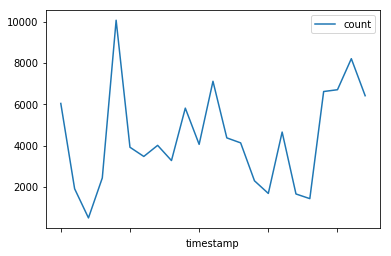

In [159]:
c.plot()

## Seperate Genres Column 

In [168]:
#(movie_data.set_index(movie_data.columns.drop('genres',1).tolist())
#  ...:    .genres.str.split('|', expand=True)
#   ...:    .stack()
#  ...:    .reset_index()
#   ...:    .rename(columns={0:'genres'})
#   ...:    .loc[:, movie_data.columns]
#   ...: )

In [175]:
d = movie_data.set_index(movie_data.columns.drop('genres',1).tolist()).genres.str.split('|', expand=True).stack().reset_index().rename(columns={0:'genres'}).loc[:, movie_data.columns]

In [176]:
d.head(10)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure,1995
1,1,Toy Story (1995),Animation,1995
2,1,Toy Story (1995),Children,1995
3,1,Toy Story (1995),Comedy,1995
4,1,Toy Story (1995),Fantasy,1995
5,2,Jumanji (1995),Adventure,1995
6,2,Jumanji (1995),Children,1995
7,2,Jumanji (1995),Fantasy,1995
8,3,Grumpier Old Men (1995),Comedy,1995
9,3,Grumpier Old Men (1995),Romance,1995


In [181]:
e = d.groupby(['year','genres'], as_index=False)['movieId'].agg(['count'])
e.reset_index(inplace=True)

## don't know how to make graph bigger... 

In [214]:
#plt.figure(figsize=(50,50))
#f = e.pivot(index='year', columns='genres', values='count')
#f.plot()
#plt.show()

<Figure size 3240x720 with 0 Axes>

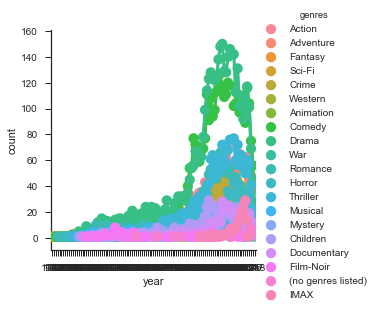

In [219]:
plt.figure(figsize=(45,10))
sns.factorplot('year','count',hue='genres',data=e)

## Number of movie in each genre 

In [203]:
g = d.groupby(['genres'], as_index=False)['movieId'].agg(['count'])
g.sort_values(by=['count'],ascending=False)

,count
genres,
Drama,4361
Comedy,3756
Thriller,1894
Action,1828
Romance,1596
Adventure,1263
Crime,1199
Sci-Fi,980
Horror,978


## Merge Again 

In [255]:
movie_genres_ratings = pd.merge(d, rating_data)
movie_genres_ratings.head(10)

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,1995,1,4.0,2000
1,1,Toy Story (1995),Adventure,1995,5,4.0,1996
2,1,Toy Story (1995),Adventure,1995,7,4.5,2005
3,1,Toy Story (1995),Adventure,1995,15,2.5,2017
4,1,Toy Story (1995),Adventure,1995,17,4.5,2011
5,1,Toy Story (1995),Adventure,1995,18,3.5,2016
6,1,Toy Story (1995),Adventure,1995,19,4.0,2000
7,1,Toy Story (1995),Adventure,1995,21,3.5,2014
8,1,Toy Story (1995),Adventure,1995,27,3.0,2000
9,1,Toy Story (1995),Adventure,1995,31,5.0,1996


## Overall average rating of each genre

In [256]:
avg_rating_by_genre = movie_genres_ratings.groupby(['genres'], as_index=False)['rating'].aggregate(np.mean)
avg_rating_by_genre.sort_values(by=['rating'],ascending=False)

,genres,rating
10,Film-Noir,3.920115
18,War,3.808294
7,Documentary,3.797785
6,Crime,3.658294
8,Drama,3.656184
14,Mystery,3.632460
3,Animation,3.629937
12,IMAX,3.618335
19,Western,3.583938
13,Musical,3.563678


## To see how rating changes through years of each genre
## don't know how to make graph bigger

In [257]:
avg_rating_by_genre_year = movie_genres_ratings.groupby(['year','genres'], as_index=False)['rating'].aggregate(np.mean)

In [258]:
avg_rating_by_genre_year.head(10)

,year,genres,rating
0,1902,Action,3.5
1,1902,Adventure,3.5
2,1902,Fantasy,3.5
3,1902,Sci-Fi,3.5
4,1903,Crime,2.5
5,1903,Western,2.5
6,1908,Animation,4.0
7,1908,Comedy,4.0
8,1908,Sci-Fi,4.0
9,1915,Drama,2.0


<Figure size 3240x720 with 0 Axes>

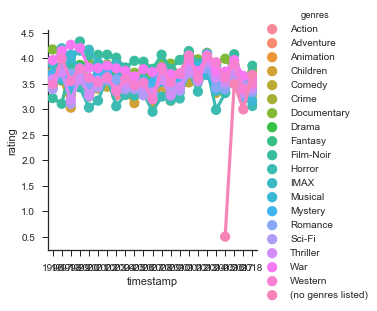

In [224]:
plt.figure(figsize=(45,10))
sns.factorplot('timestamp','rating',hue='genres',data=avg_rating_by_genre_year)

# 4.Tags 

In [232]:
tags_data=pd.read_csv('/Users/ziranmin/Desktop/ml-latest-small/tags.csv')

In [233]:
tags_data['timestamp'] = tags_data['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))

In [236]:
tags_data = tags_data.rename(columns={'timestamp': 'tagtime'}, inplace=False)

In [238]:
tags_data.head()

,userId,movieId,tag,tagtime
0,2,60756,funny,2015
1,2,60756,Highly quotable,2015
2,2,60756,will ferrell,2015
3,2,89774,Boxing story,2015
4,2,89774,MMA,2015


In [241]:
tags_data['tag'].unique().tolist()

['funny',
 'Highly quotable',
 'will ferrell',
 'Boxing story',
 'MMA',
 'Tom Hardy',
 'drugs',
 'Leonardo DiCaprio',
 'Martin Scorsese',
 'way too long',
 'Al Pacino',
 'gangster',
 'mafia',
 'Mafia',
 'holocaust',
 'true story',
 'twist ending',
 'Anthony Hopkins',
 'courtroom drama',
 'britpop',
 'indie record label',
 'music',
 'dumpster diving',
 'Sustainability',
 'romantic comedy',
 'wedding',
 'painter',
 'bloody',
 'black hole',
 'sci-fi',
 'time-travel',
 'fantasy',
 'magic board game',
 'Robin Williams',
 'beautiful scenery',
 'epic',
 'historical',
 'inspirational',
 'Medieval',
 'mel gibson',
 'Oscar (Best Cinematography)',
 'revenge',
 'sword fight',
 'black comedy',
 'Christina Ricci',
 'Christopher Lloyd',
 'dark comedy',
 'family',
 'gothic',
 'Andy Garcia',
 'Classic',
 'Francis Ford Coppola',
 'Family',
 'quirky',
 'Macaulay Culkin',
 'sequel',
 'animation',
 'Disney',
 'original',
 'Pixar',
 'Tom Hanks',
 'ancient Rome',
 'Epic',
 'history',
 'imdb top 250',
 'Rome'

In [242]:
len(tags_data['tag'].unique().tolist())

1589

In [262]:
most_use_tags = tags_data.groupby(['tag'], as_index=False)['movieId'].agg(['count'])
most_use_tags.sort_values(by=['count'],ascending=False)[:10]

,count
tag,
In Netflix queue,131
atmospheric,36
thought-provoking,24
superhero,24
Disney,23
surreal,23
funny,23
religion,22
dark comedy,21


## Merge tag and user 

In [266]:
user_tags = pd.merge(tags_data, rating_data)

In [267]:
user_tags.head()

,userId,movieId,tag,tagtime,rating,timestamp
0,2,60756,funny,2015,5.0,2015
1,2,60756,Highly quotable,2015,5.0,2015
2,2,60756,will ferrell,2015,5.0,2015
3,2,89774,Boxing story,2015,5.0,2015
4,2,89774,MMA,2015,5.0,2015


## Merge tag, user and movie

In [268]:
movie_tags = pd.merge(tags_data, movie_genres_ratings)

In [270]:
movie_tags.head(10)

,userId,movieId,tag,tagtime,title,genres,year,rating,timestamp
0,2,60756,funny,2015,Step Brothers (2008),Comedy,2008,5.0,2015
1,2,60756,Highly quotable,2015,Step Brothers (2008),Comedy,2008,5.0,2015
2,2,60756,will ferrell,2015,Step Brothers (2008),Comedy,2008,5.0,2015
3,2,89774,Boxing story,2015,Warrior (2011),Drama,2011,5.0,2015
4,2,89774,MMA,2015,Warrior (2011),Drama,2011,5.0,2015
5,2,89774,Tom Hardy,2015,Warrior (2011),Drama,2011,5.0,2015
6,2,106782,drugs,2015,"Wolf of Wall Street, The (2013)",Comedy,2013,5.0,2015
7,2,106782,drugs,2015,"Wolf of Wall Street, The (2013)",Crime,2013,5.0,2015
8,2,106782,drugs,2015,"Wolf of Wall Street, The (2013)",Drama,2013,5.0,2015
9,2,106782,Leonardo DiCaprio,2015,"Wolf of Wall Street, The (2013)",Comedy,2013,5.0,2015
